In [11]:
import json

with open('results.json') as f:
    results = json.load(f)

In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def plot_instances(features):
    fig, axes = plt.subplots(1, 30)
    fig.set_size_inches(40, 7)
    for i, ax in enumerate(axes):
        image = plt.imread(features[i][0])
        label = float(features[i][1])
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.set_axis_off()
    plt.show()

In [14]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id + 1}\n")
    print("Top-k tokens w.r.t. average attention score:")
    pair = results[concept_id]
    token_attn = [(t, a) for t, a, _ in pair["concept"]]
    for idx, (t, a) in enumerate(token_attn):
        print(f"\t{idx + 1}. {t}: {a:.4f}", sep=" ")
    print("\nTop-n images with largest absolute values of logits:")
    plot_instances(pair["feature"])
    print(100 * "-")

Concept #1

Top-k tokens w.r.t. average attention score:
	1. <pad>: 1.0000
	2. three: 0.0769
	3. has: 0.0769
	4. four: 0.0769
	5. angle: 0.0769
	6. left: 0.0525
	7. white: 0.0521
	8. up: 0.0517
	9. rotate: 0.0517
	10. blue: 0.0513
	11. green: 0.0513
	12. canvas: 0.0513
	13. position: 0.0513
	14. color: 0.0513
	15. red: 0.0513
	16. shape: 0.0513
	17. this: 0.0513
	18. bottom: 0.0509
	19. unrotate: 0.0509
	20. blank: 0.0503
	21. right: 0.0500
	22. is: 0.0000
	23. round: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


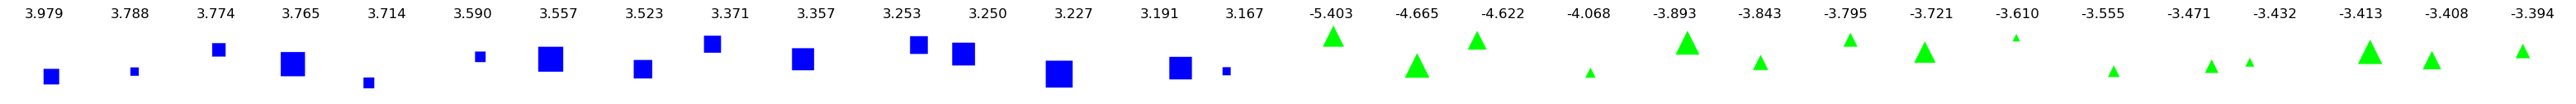

----------------------------------------------------------------------------------------------------
Concept #2

Top-k tokens w.r.t. average attention score:
	1. position: 0.8038
	2. <pad>: 0.5885
	3. three: 0.0000
	4. has: 0.0000
	5. four: 0.0000
	6. angle: 0.0000
	7. left: 0.0000
	8. white: 0.0000
	9. up: 0.0000
	10. rotate: 0.0000
	11. blue: 0.0000
	12. green: 0.0000
	13. canvas: 0.0000
	14. this: 0.0000
	15. color: 0.0000
	16. red: 0.0000
	17. shape: 0.0000
	18. bottom: 0.0000
	19. unrotate: 0.0000
	20. blank: 0.0000
	21. right: 0.0000
	22. is: 0.0000
	23. round: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


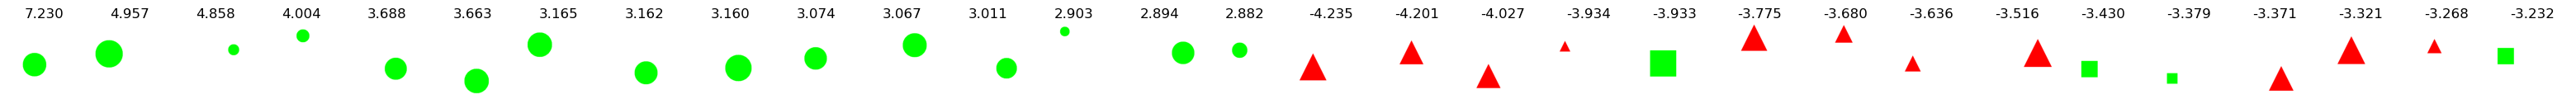

----------------------------------------------------------------------------------------------------
Concept #3

Top-k tokens w.r.t. average attention score:
	1. angle: 0.6968
	2. three: 0.3973
	3. <pad>: 0.3776
	4. blue: 0.3429
	5. green: 0.2670
	6. is: 0.0816
	7. round: 0.0286
	8. this: 0.0209
	9. position: 0.0134
	10. right: 0.0023
	11. red: 0.0019
	12. has: 0.0016
	13. up: 0.0000
	14. blank: 0.0000
	15. unrotate: 0.0000
	16. canvas: 0.0000
	17. shape: 0.0000
	18. color: 0.0000
	19. rotate: 0.0000
	20. white: 0.0000
	21. bottom: 0.0000
	22. left: 0.0000
	23. four: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


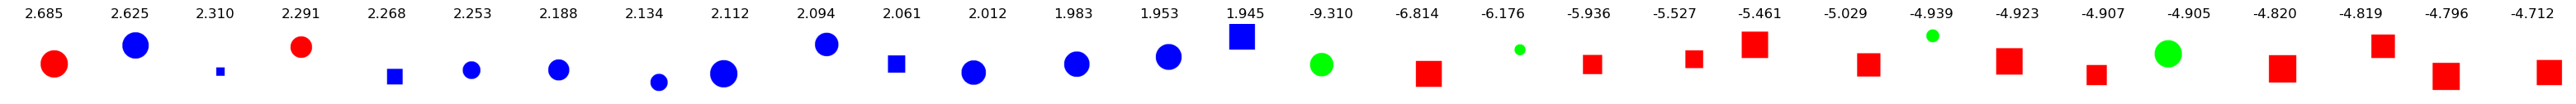

----------------------------------------------------------------------------------------------------
Concept #4

Top-k tokens w.r.t. average attention score:
	1. canvas: 0.1191
	2. shape: 0.1190
	3. blank: 0.1184
	4. color: 0.1166
	5. white: 0.1150
	6. bottom: 0.1147
	7. rotate: 0.1147
	8. is: 0.1144
	9. left: 0.1125
	10. position: 0.0921
	11. blue: 0.0809
	12. this: 0.0745
	13. unrotate: 0.0679
	14. has: 0.0618
	15. up: 0.0456
	16. three: 0.0240
	17. four: 0.0226
	18. green: 0.0121
	19. <pad>: 0.0106
	20. round: 0.0029
	21. red: 0.0013
	22. right: 0.0000
	23. angle: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


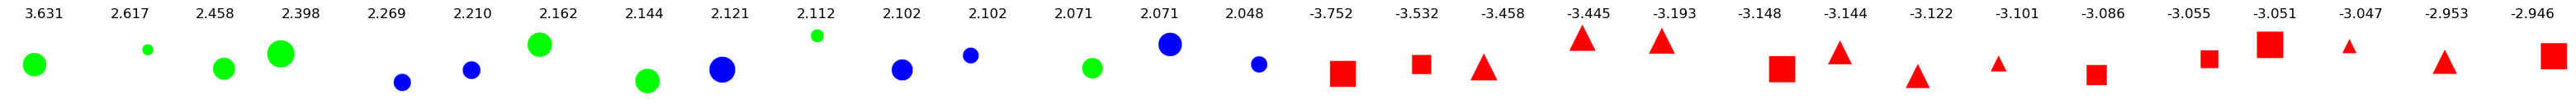

----------------------------------------------------------------------------------------------------
Concept #5

Top-k tokens w.r.t. average attention score:
	1. has: 0.6695
	2. red: 0.4313
	3. <pad>: 0.3824
	4. four: 0.1938
	5. this: 0.1858
	6. position: 0.0296
	7. up: 0.0035
	8. shape: 0.0008
	9. round: 0.0000
	10. is: 0.0000
	11. blue: 0.0000
	12. green: 0.0000
	13. bottom: 0.0000
	14. right: 0.0000
	15. blank: 0.0000
	16. unrotate: 0.0000
	17. canvas: 0.0000
	18. color: 0.0000
	19. rotate: 0.0000
	20. white: 0.0000
	21. left: 0.0000
	22. three: 0.0000
	23. angle: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


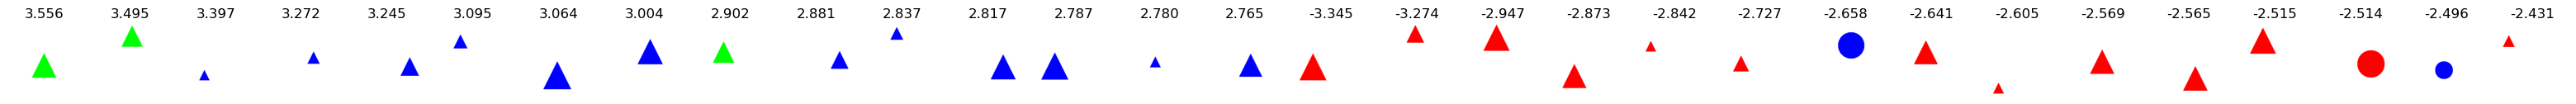

----------------------------------------------------------------------------------------------------
Concept #6

Top-k tokens w.r.t. average attention score:
	1. green: 0.8279
	2. red: 0.7431
	3. round: 0.4817
	4. <pad>: 0.2806
	5. blue: 0.0513
	6. has: 0.0256
	7. four: 0.0256
	8. angle: 0.0256
	9. three: 0.0256
	10. white: 0.0184
	11. bottom: 0.0178
	12. unrotate: 0.0174
	13. left: 0.0174
	14. shape: 0.0171
	15. canvas: 0.0171
	16. color: 0.0171
	17. this: 0.0171
	18. position: 0.0171
	19. rotate: 0.0168
	20. right: 0.0168
	21. up: 0.0163
	22. blank: 0.0156
	23. is: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


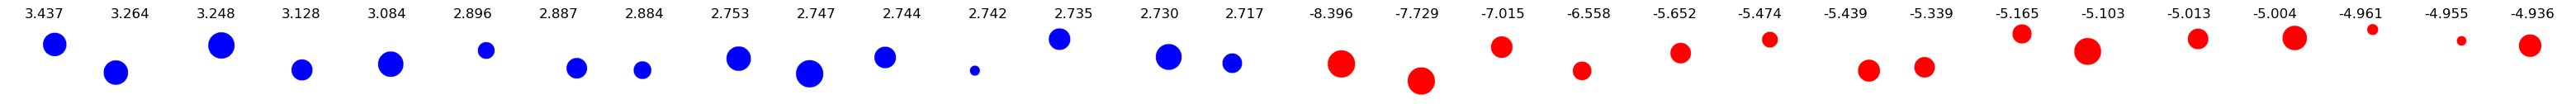

----------------------------------------------------------------------------------------------------
Concept #7

Top-k tokens w.r.t. average attention score:
	1. red: 0.8113
	2. four: 0.7412
	3. <pad>: 0.7269
	4. has: 0.3602
	5. three: 0.0000
	6. blue: 0.0000
	7. green: 0.0000
	8. angle: 0.0000
	9. bottom: 0.0000
	10. position: 0.0000
	11. white: 0.0000
	12. left: 0.0000
	13. rotate: 0.0000
	14. canvas: 0.0000
	15. color: 0.0000
	16. shape: 0.0000
	17. this: 0.0000
	18. unrotate: 0.0000
	19. right: 0.0000
	20. blank: 0.0000
	21. up: 0.0000
	22. is: 0.0000
	23. round: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


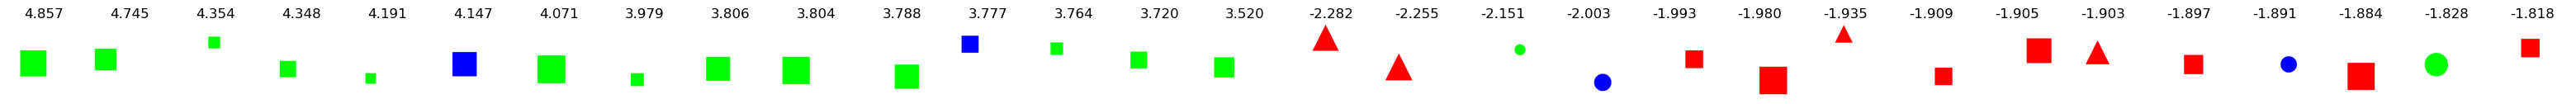

----------------------------------------------------------------------------------------------------
Concept #8

Top-k tokens w.r.t. average attention score:
	1. four: 0.9118
	2. <pad>: 0.6446
	3. color: 0.2796
	4. position: 0.2014
	5. has: 0.0003
	6. three: 0.0000
	7. angle: 0.0000
	8. white: 0.0000
	9. left: 0.0000
	10. rotate: 0.0000
	11. bottom: 0.0000
	12. shape: 0.0000
	13. canvas: 0.0000
	14. green: 0.0000
	15. blue: 0.0000
	16. this: 0.0000
	17. red: 0.0000
	18. up: 0.0000
	19. unrotate: 0.0000
	20. right: 0.0000
	21. blank: 0.0000
	22. is: 0.0000
	23. round: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


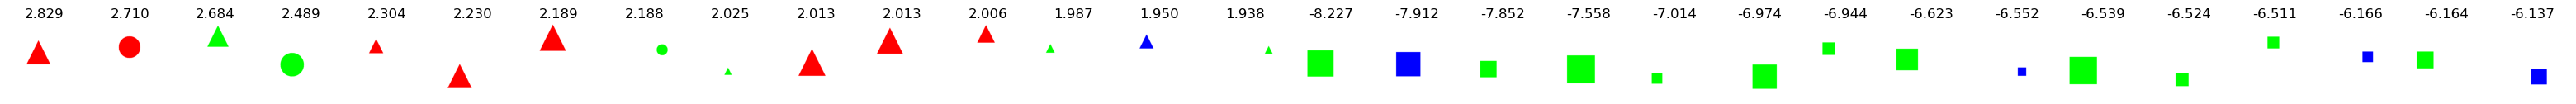

----------------------------------------------------------------------------------------------------
Concept #9

Top-k tokens w.r.t. average attention score:
	1. four: 0.6132
	2. green: 0.5594
	3. <pad>: 0.5172
	4. position: 0.3874
	5. red: 0.1465
	6. has: 0.0008
	7. three: 0.0000
	8. blue: 0.0000
	9. angle: 0.0000
	10. left: 0.0000
	11. white: 0.0000
	12. bottom: 0.0000
	13. rotate: 0.0000
	14. shape: 0.0000
	15. canvas: 0.0000
	16. color: 0.0000
	17. this: 0.0000
	18. unrotate: 0.0000
	19. up: 0.0000
	20. blank: 0.0000
	21. right: 0.0000
	22. is: 0.0000
	23. round: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


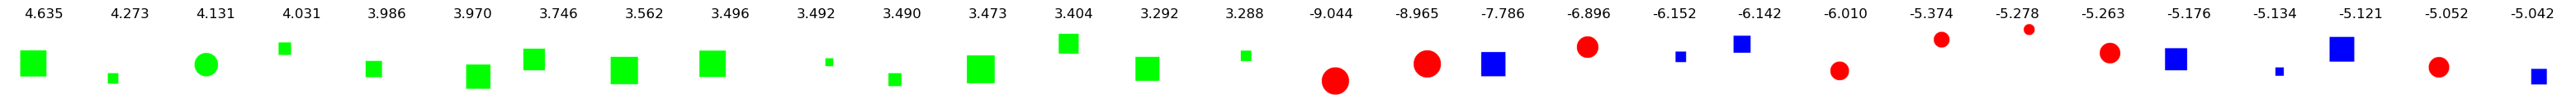

----------------------------------------------------------------------------------------------------
Concept #10

Top-k tokens w.r.t. average attention score:
	1. right: 0.4907
	2. round: 0.3913
	3. up: 0.3672
	4. this: 0.2304
	5. green: 0.2281
	6. red: 0.1418
	7. position: 0.0557
	8. <pad>: 0.0438
	9. three: 0.0395
	10. white: 0.0333
	11. rotate: 0.0094
	12. angle: 0.0006
	13. canvas: 0.0002
	14. left: 0.0000
	15. bottom: 0.0000
	16. blue: 0.0000
	17. four: 0.0000
	18. has: 0.0000
	19. blank: 0.0000
	20. shape: 0.0000
	21. color: 0.0000
	22. unrotate: 0.0000
	23. is: 0.0000
	24. <unk>: nan

Top-n images with largest absolute values of logits:


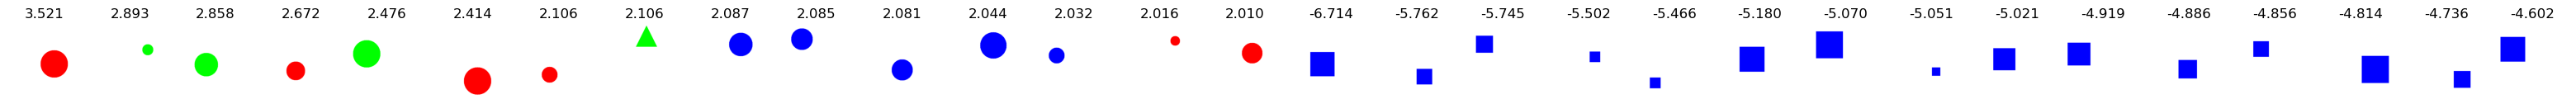

----------------------------------------------------------------------------------------------------


In [15]:
for i in range(10):
    visualize_concept(i)